<a href="https://colab.research.google.com/github/dbschrier/Neural_Networks_Mini_Project_1/blob/master/MNIST_Dataset_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

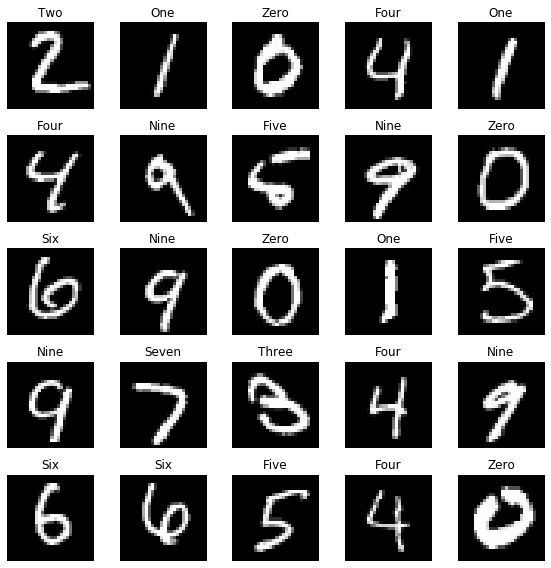

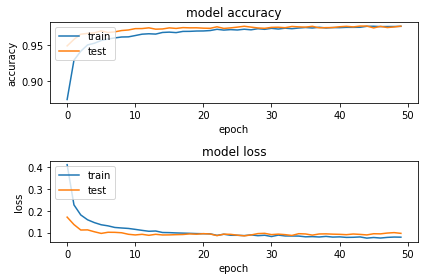

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#importing the MNIST dataset, ~size of 60,000 images, represented by a numpy array of 28x28.
data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

#Normalizing the data to be within a unit range
train_images = train_images/255.0
test_images = test_images/255.0

#Creating classification labels for each of the numbers, which will be used to output a predicition from the Neural Network
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
              'Five', 'Six', 'Seven', 'Eight', 'Nine']


#Creating the Neural Network Model.
"""
There are three layers inside the neural network. The first is to set the 28x28 array from a single photo as our 
input data. Then there's the hidden layer that is of size 128. The activation function is Rectified Linear Unit, 
which returns the value previously given that it is above 0.0, which is expected in this case. It however makes 
computation much simpler. The output layer has a size of 10 tensor in which the activation function gives a 
probability distribution ranging from 0 to 1. This is to determine how likely the photo is one of the tensors.
By taking the maximum value inside this array, we can figure out what the neural network thinks is the number it is
processing. 
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dropout(rate = 0.5),
    keras.layers.Dense(128, activation = "relu"), #setting all tensor values to be above zero
    keras.layers.Dense(10, activation = "softmax") #probability ranging from zero to one
])

"""
Here we're compiling our data and running it through the neural network. We are using Adam to optimize our learning
rate such that the loss function (Cross Entropy in this case) is minimized when we apply gradient descent. We are 
also recording the loss, as well as the accuracy over the entire test run. With 10 epochs, and 60,000 images. We are 
showing the network 3,000,000 images. As a result, the accuracy should be around 96%. 
"""
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
#Getting the data from the training/fitting from the training images and labels.
history = model.fit(train_images,train_labels, validation_split=0.33, epochs=50, batch_size=10, verbose=0)
predict = model.predict(test_images)


#Contructing a plot of predictions with the training images from the MNIST dataset.
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_images[i], cmap= plt.get_cmap('gray'))
    plt.title(class_names[np.argmax(predict[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()



#Plotting the Accuracy with Respect to the number of epochs
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#Plotting the Loss with Respect to the number of epochs
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

